In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Hyper-parameters 
input_size = 784
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [3]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

## 1 Linear

In [5]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [6]:
# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [12]:
auc = []
epochs = range(num_epochs)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 200 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()
    auc.append(correct / total)

Epoch [1/10], Step [200/600], Loss: 1.0415
Epoch [1/10], Step [400/600], Loss: 0.8403
Epoch [1/10], Step [600/600], Loss: 0.9089
Epoch [2/10], Step [200/600], Loss: 1.0156
Epoch [2/10], Step [400/600], Loss: 0.8888
Epoch [2/10], Step [600/600], Loss: 0.8836
Epoch [3/10], Step [200/600], Loss: 0.9314
Epoch [3/10], Step [400/600], Loss: 0.7875
Epoch [3/10], Step [600/600], Loss: 0.7506
Epoch [4/10], Step [200/600], Loss: 0.7648
Epoch [4/10], Step [400/600], Loss: 0.7238
Epoch [4/10], Step [600/600], Loss: 0.8717
Epoch [5/10], Step [200/600], Loss: 0.8862
Epoch [5/10], Step [400/600], Loss: 0.6866
Epoch [5/10], Step [600/600], Loss: 0.7106
Epoch [6/10], Step [200/600], Loss: 0.8482
Epoch [6/10], Step [400/600], Loss: 0.6222
Epoch [6/10], Step [600/600], Loss: 0.6002
Epoch [7/10], Step [200/600], Loss: 0.7422
Epoch [7/10], Step [400/600], Loss: 0.7013
Epoch [7/10], Step [600/600], Loss: 0.6941
Epoch [8/10], Step [200/600], Loss: 0.6620
Epoch [8/10], Step [400/600], Loss: 0.7060
Epoch [8/10

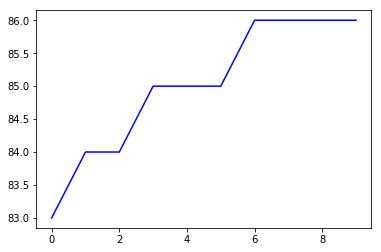

In [16]:
plt.plot(epochs, auc, 'b', label = '1')
pass

## 2 Linear

In [39]:
# Hyper-parameters 
input_size = 784
hidden1_size = 500
hidden2_size = 500
hidden3_size = 250
hidden4_size = 100
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [40]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size) 
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, hidden3_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden3_size, hidden4_size) 
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden4_size, num_classes) 
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        
        return out

In [41]:
auc = []
epochs = range(num_epochs)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 200 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()
    auc.append(100 * correct / total)

Epoch [1/20], Step [200/600], Loss: 0.3963
Epoch [1/20], Step [400/600], Loss: 0.4103
Epoch [1/20], Step [600/600], Loss: 0.5133
Epoch [2/20], Step [200/600], Loss: 0.3954
Epoch [2/20], Step [400/600], Loss: 0.5390
Epoch [2/20], Step [600/600], Loss: 0.4314
Epoch [3/20], Step [200/600], Loss: 0.4553
Epoch [3/20], Step [400/600], Loss: 0.3833
Epoch [3/20], Step [600/600], Loss: 0.5481
Epoch [4/20], Step [200/600], Loss: 0.4027
Epoch [4/20], Step [400/600], Loss: 0.4992
Epoch [4/20], Step [600/600], Loss: 0.4650
Epoch [5/20], Step [200/600], Loss: 0.3804
Epoch [5/20], Step [400/600], Loss: 0.5685
Epoch [5/20], Step [600/600], Loss: 0.5210
Epoch [6/20], Step [200/600], Loss: 0.4353
Epoch [6/20], Step [400/600], Loss: 0.4020
Epoch [6/20], Step [600/600], Loss: 0.5935
Epoch [7/20], Step [200/600], Loss: 0.5690
Epoch [7/20], Step [400/600], Loss: 0.4291
Epoch [7/20], Step [600/600], Loss: 0.3507
Epoch [8/20], Step [200/600], Loss: 0.4231
Epoch [8/20], Step [400/600], Loss: 0.5680
Epoch [8/20

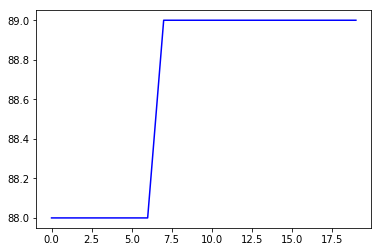

In [42]:
plt.plot(epochs, auc, 'b', label = '1')
pass

In [48]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: ', 100 * correct / total)


Accuracy of the model on the 10000 test images:  tensor(89)


In [ ]:

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')